In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sn

Import and load the 'fashion_mnist' dataset from TensorFlow. Using 2 dictionaries store the fashion_mnist datasets into unsupervised_firstname and supervised_firstname, where firstname is your firstname. The first 60,000 data samples will be stored in unsupervised_firstname directory with one key 'images', which will contain the images for unsupervised learning. The next 10,000 data samples will be stored in supervised_firstname directory with keys 'images' and 'labels', which will contain the images and labels for supervised learning

In [2]:
fashion_data = tf.keras.datasets.fashion_mnist.load_data()
unsupervised_jefil ={'images':fashion_data[0][0]}
supervised_jefil ={'images':fashion_data[1][0],'labels':fashion_data[1][1]}

In [3]:
#Display (print) the image resolution (dimension) of the input images.
print(f'The shape of the unsupervised images is {unsupervised_jefil["images"].shape}')
print(f'The shape of the supervised images is {supervised_jefil["images"].shape}')
print(f'The shape of the supervised labels is{supervised_jefil["labels"].shape}')

The shape of the unsupervised images is (60000, 28, 28)
The shape of the supervised images is (10000, 28, 28)
The shape of the supervised labels is(10000,)


# Data Pre-processing

Normalize the pixal values in the dataset to a range between 0-1. Store result back into unsupervised_firstname['images'] and supervised_firstname['images']

In [4]:
unsupervised_int_to_float = unsupervised_jefil["images"].astype('float32')
supervised_int_to_float = supervised_jefil["images"].astype('float32')

unsupervised_jefil["images"] = unsupervised_int_to_float/255.0
supervised_jefil["images"] = supervised_int_to_float/255.0

Using tenflow's build in method to_cateogircal() to one-hot encode the labels. Store results back into supervised_firstname['labels'].

In [5]:
supervised_jefil['labels'] = tf.keras.utils.to_categorical(supervised_jefil['labels'],num_classes=10)

Display (print) the shape of the unsupervised_firstname['images'], supervised_firstname['images'] and supervised_firstname['labels']

In [6]:
print(f'Shape of unsupervised[\'images\'] is {unsupervised_jefil["images"].shape}')
print(f'Shape of supervised[\'images\'] is {supervised_jefil["images"].shape}')
print(f'Shape of supervised[\'labels\'] is {supervised_jefil["labels"].shape}')

Shape of unsupervised['images'] is (60000, 28, 28)
Shape of supervised['images'] is (10000, 28, 28)
Shape of supervised['labels'] is (10000, 10)


# Data Preparation

In [7]:
#reshape the dataset to have a single channel
unsupervised_X = unsupervised_jefil["images"].reshape((unsupervised_jefil["images"].shape[0],28,28,1))
supervised_X= supervised_jefil["images"].reshape((supervised_jefil["images"].shape[0],28,28,1))

Using Sklearn's train_test_split() method split the unsupervised dataset into training (57,000 samples) and validation (3,000 samples). Set the random seed to be the last two digits of your student ID number. Store the training and validation data in a dataframe named: unsupervised_train_firstname and unsupervised_val_firstname for the feature (predictors) of the training and validation data respectively

In [8]:
unsupervised_train_jefil, unsupervised_val_jefil = train_test_split(unsupervised_X, test_size=0.05, random_state=10)

In [9]:
unsupervised_train_jefil.shape

(57000, 28, 28, 1)

In [10]:
unsupervised_val_jefil.shape

(3000, 28, 28, 1)

Using Sklearn's train_test_split() method randomly discard 7,000 samples from the supervised dataset. Set the random seed to be the last two digits of your student ID number

In [11]:
x_jefil,x_drop_jefil,y_jefil,y_drop_jefil = train_test_split(supervised_X,supervised_jefil['labels'],test_size=0.70,random_state=10)

In [12]:
x_drop_jefil.shape

(7000, 28, 28, 1)

In [13]:
y_drop_jefil.shape

(7000, 10)

Using Sklearn's train_test_split() method split the remaining supervised dataset (3,000 samples) into training (1800), validation(600) and testing(600).Set the random seed to be the last two digits of your student ID number.Store the datasets in a dataframe named:x_train_firstname, x_val_firstname, and x_test_firstname for the feature (predictors) and the training labels y_train_firstname, y_val_firstname, and y_test_firstname.

In [14]:
#  train-val split
x_train_jefil, x_val_jefil, y_train_jefil, y_val_jefil = train_test_split(x_jefil, y_jefil, test_size= 0.40, random_state=10)

#  val-test split
x_val_jefil, x_test_jefil, y_val_jefil, y_test_jefil = train_test_split(x_val_jefil, y_val_jefil, test_size= 0.50, random_state=10)

Display (print) the shape of the unsupervised_train_firstname, unsupervised_val_firstname, x_train_firstname, x_val_firstname, x_test_firstname, y_train_firstname, y_val_firstname, and y_test_firstname

In [15]:
print(f'Shape of unsupervised_train_jefil is {unsupervised_train_jefil.shape}')
print(f'Shape of unsupervised_val_jefil is {unsupervised_val_jefil.shape}')
print(f'Shape of x_train_jefil is {x_train_jefil.shape}')
print(f'Shape of x_val_jefil is {x_val_jefil.shape}')
print(f'Shape of x_test_jefil is {x_test_jefil.shape}')
print(f'Shape of y_train_jefil is {y_train_jefil.shape}')
print(f'Shape of y_val_jefil is {y_val_jefil.shape}')
print(f'Shape of y_test_jefil is {y_test_jefil.shape}')


Shape of unsupervised_train_jefil is (57000, 28, 28, 1)
Shape of unsupervised_val_jefil is (3000, 28, 28, 1)
Shape of x_train_jefil is (1800, 28, 28, 1)
Shape of x_val_jefil is (600, 28, 28, 1)
Shape of x_test_jefil is (600, 28, 28, 1)
Shape of y_train_jefil is (1800, 10)
Shape of y_val_jefil is (600, 10)
Shape of y_test_jefil is (600, 10)


# Build, Train, and Validate a baseline CNN Model

Use TensorFlow's Sequential() to build a CNN mode (name the model cnn_v1_model_firstname) with the following architecture:

i. Input = Set based on image size of the fashion MNIST dataset.

ii. 1st Layer = Convolution with 16 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2.

iii. 3rd Layer = Convolution with 8 filter kernels with window size 3x3, , a 'relu' activation function, 'same' padding, and a stride of 2. iv. 4th Layer = Full connected layer with 100 neurons (Note: Input to fully connected layer should be flatten first) v. Output = Set output size using info identified in Step b.3 and a softmax activation function

In [16]:
cnn_v1_model_jefil = Sequential()
cnn_v1_model_jefil.add(Conv2D(16,(3,3),activation = 'relu',padding='same', strides=2,input_shape=(28,28,1)))
cnn_v1_model_jefil.add(MaxPooling2D(2,2))
cnn_v1_model_jefil.add(Conv2D(8,(3,3),activation = 'relu',padding='same', strides=2))
cnn_v1_model_jefil.add(MaxPooling2D(2,2))
cnn_v1_model_jefil.add(Flatten())
cnn_v1_model_jefil.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
cnn_v1_model_jefil.add(Dense(10,activation='softmax'))

Compile the model with 'adam' optimizer, 'cateogrical_crossentropy' loss function, 'accuracy' metric

In [17]:
cnn_v1_model_jefil.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Display (print) a summary of the model using summary(). Draw a diagram illustrating the structure of the neural network model, making note of the size of each layer (# of neurons) and number of weights in each layer.

In [18]:
cnn_v1_model_jefil.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 100)               3

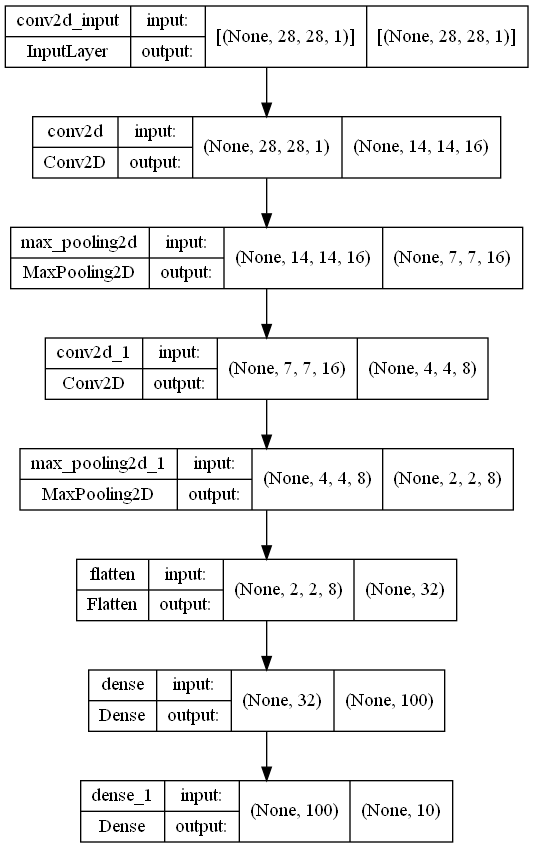

In [19]:
tf.keras.utils.plot_model(cnn_v1_model_jefil, to_file='model_test.png', show_shapes=True, show_layer_names=True)

Using TensorFlow's fit() and the training/validation supervised dataset to train and validate the cnn model with 10 epochs and batch size of 256. Store training/validation results in cnn_v1_history_firstname

In [20]:
cnn_v1_history_jefil = cnn_v1_model_jefil.fit(x_train_jefil,y_train_jefil,epochs=10,batch_size=256,validation_data=(x_val_jefil,y_val_jefil))

Epoch 1/10
8/8 [==============================] - 1s 30ms/step - loss: 2.3010 - accuracy: 0.1478 - val_loss: 2.2752 - val_accuracy: 0.1550
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 2.2603 - accuracy: 0.1878 - val_loss: 2.2401 - val_accuracy: 0.2400
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 2.2129 - accuracy: 0.3406 - val_loss: 2.1825 - val_accuracy: 0.3600
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 2.1379 - accuracy: 0.3978 - val_loss: 2.0915 - val_accuracy: 0.3983
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 2.0226 - accuracy: 0.4111 - val_loss: 1.9595 - val_accuracy: 0.4217
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 1.8711 - accuracy: 0.4561 - val_loss: 1.7967 - val_accuracy: 0.4667
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 1.6899 - accuracy: 0.4839 - val_loss: 1.6106 - val_accuracy: 0.4850
Epoch 8/10
8/8 [===========

# Test and analyze the baseline model

Display (plot) the Training Vs Validation Accuracy of the baseline CNN Model as a line graph using matplotlib. Provide proper axis labels, title and a legend. Use different line color's for training and validation accuracy. Compare and analyze the training and validation accuracy in your report.

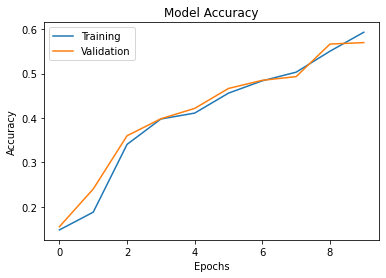

In [21]:
plt.title('Model Accuracy')
plt.plot(cnn_v1_history_jefil.history['accuracy'])
plt.plot(cnn_v1_history_jefil.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'], loc='upper left')
plt.show()

Evaluate the cnn model with the test dataset using Tensorflow's evaluate() and display (Print) the test accuracy. Compare and discuss the test accuracy to the validation accuracy in your report

In [22]:
eval_result = cnn_v1_model_jefil.evaluate(x_test_jefil,y_test_jefil, verbose=2)
eval_result
print(f'Test loss: {eval_result[0]}')
print(f'Test accuracy: {eval_result[1]}')

19/19 - 0s - loss: 1.2099 - accuracy: 0.5850 - 44ms/epoch - 2ms/step
Test loss: 1.2099390029907227
Test accuracy: 0.5849999785423279


In [23]:
print("Train accuracy: ", cnn_v1_history_jefil.history['accuracy'] )
print("Validation accuracy: ", cnn_v1_history_jefil.history['val_accuracy'])

Train accuracy:  [0.14777778089046478, 0.18777777254581451, 0.3405555486679077, 0.3977777659893036, 0.41111111640930176, 0.4561111032962799, 0.4838888943195343, 0.503333330154419, 0.5505555272102356, 0.5933333039283752]
Validation accuracy:  [0.1550000011920929, 0.23999999463558197, 0.36000001430511475, 0.398333340883255, 0.4216666519641876, 0.46666666865348816, 0.48500001430511475, 0.4933333396911621, 0.5666666626930237, 0.5699999928474426]


Create predictions on the test dataset using TensorFlow's predict(). Name in the predictions cnn_predictions_firstname.

In [24]:
cnn_predictions_jefil = cnn_v1_model_jefil.predict(x_test_jefil)

Display (plot) the confusion matrix of the test prediction using matplotlib, seaborn, and sklearn's confusion matrix.

In [25]:
decoded_actual_labels = tf.math.argmax(y_test_jefil,axis=1)
test_actual=np.asarray(decoded_actual_labels)

In [26]:
predicted_values=[]
for i in range(len(cnn_predictions_jefil)):
    predicted_values.append(np.argmax(cnn_predictions_jefil[i],axis=0))
predicted_values = np.asarray(predicted_values) 
label_list = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

<AxesSubplot:>

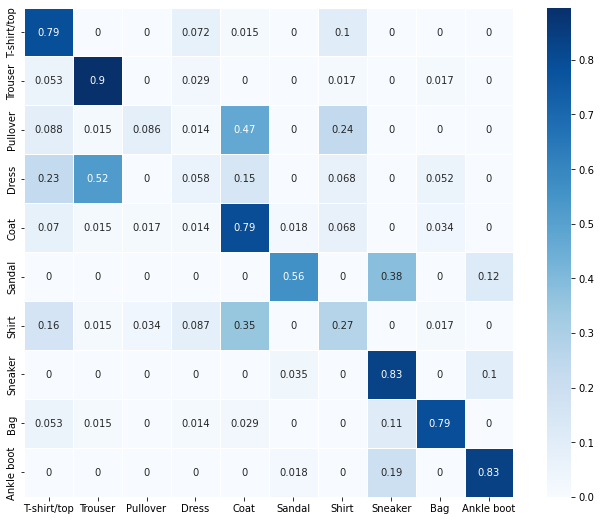

In [27]:
cm = confusion_matrix(test_actual,predicted_values)
confusion_matrix_percentage_data=cm / cm.astype(float).sum(axis=1)
plt.figure(figsize=(12, 9))

sn.heatmap(confusion_matrix_percentage_data,annot=True, cmap='Blues',xticklabels=label_list, yticklabels=label_list, square=1, linewidth=1.)

Using tf.random.normal(), add random noise to the training and validation unsupervised dataset with a noise factor of 0.2.

In [28]:
noise_factor = 0.2
x_train_noisy_jefil = unsupervised_train_jefil + noise_factor * tf.random.normal(shape=unsupervised_train_jefil.shape,seed=10) 
x_val_noisy_jefil = unsupervised_val_jefil + noise_factor * tf.random.normal(shape=unsupervised_val_jefil.shape,seed=10) 

Using tf.clip_by_value(), clip the values of the noisy dataset to a range between 0 and 1. Store results back into x_train_noisy_firstname and x_val_noisy_firstname

In [29]:
x_train_noisy_jefil = tf.clip_by_value(x_train_noisy_jefil, clip_value_min=0., clip_value_max=1.)
x_val_noisy_jefil = tf.clip_by_value(x_val_noisy_jefil, clip_value_min=0., clip_value_max=1.)

print("x_train_noisy_jefil: ", x_train_noisy_jefil.shape)
print("x_val_noisy_jefil", x_val_noisy_jefil.shape)

x_train_noisy_jefil:  (57000, 28, 28, 1)
x_val_noisy_jefil (3000, 28, 28, 1)


Display (plot) the first 10 images from the x_val_noisy_firstname using matplotlib

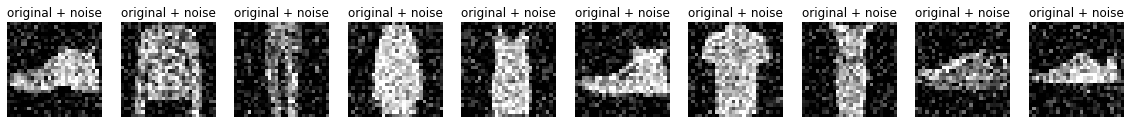

In [30]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_val_noisy_jefil[i]))
    plt.axis('off')
    plt.gray()
plt.show()


# Build and pretrain Autoencoder

i. Input = Set based on image size of the fashion MNIST dataset. Store layer as inputs_firstname.

ii. Encoder Section (Store layers as e_firstname)

Convolution with 16 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2.
Convolution with 8 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2. 5
iii. Decoder Section (Store layers as d_firstname)

Transposed Convolution with 8 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2. For more info reference: https://www.tensorflow.org/api_docs/python/tf/keras/lay ers/Conv2DTranspose
Transposed Convolution with 16 filter kernels with window size 3x3, a 'relu' activation function, 'same' padding, and a stride of 2.
Convolution with 1 filter kernels with window size 3x3, a 'sigmoid' activation function, and 'same' padding

In [31]:
input_jefil = tf.keras.Input(shape=(28, 28, 1))
e_jefil = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2, 2), padding = 'same')(input_jefil)
e_jefil = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', strides=(2, 2), padding = 'same')(e_jefil)

d_jefil = tf.keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', strides=(2, 2), padding = 'same')(e_jefil)
d_jefil = tf.keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', strides=(2, 2), padding = 'same')(d_jefil)
d_jefil = tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')(d_jefil)

autoencoder_jefil = Sequential()
autoencoder_jefil = tf.keras.Model(input_jefil, d_jefil)

Compile the model with 'adam' optimizer, and 'mean squared error' loss function

In [32]:
autoencoder_jefil.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [33]:
autoencoder_jefil.fit(x_train_noisy_jefil,unsupervised_train_jefil,
                epochs=10,
                shuffle=True,
                batch_size=256,
                validation_data=(x_val_noisy_jefil,unsupervised_val_jefil))

Epoch 1/10
223/223 [==============================] - 17s 74ms/step - loss: 0.0500 - val_loss: 0.0154
Epoch 2/10
223/223 [==============================] - 16s 74ms/step - loss: 0.0135 - val_loss: 0.0122
Epoch 3/10
223/223 [==============================] - 17s 76ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 4/10
223/223 [==============================] - 17s 76ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 5/10
223/223 [==============================] - 17s 76ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 6/10
223/223 [==============================] - 17s 76ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 7/10
223/223 [==============================] - 17s 76ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 8/10
223/223 [==============================] - 17s 77ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 9/10
223/223 [==============================] - 17s 75ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 10/10
223/223 [==============================] - 17s 76ms/step - loss: 0.008

In [34]:
autoencoder_jefil.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         145   

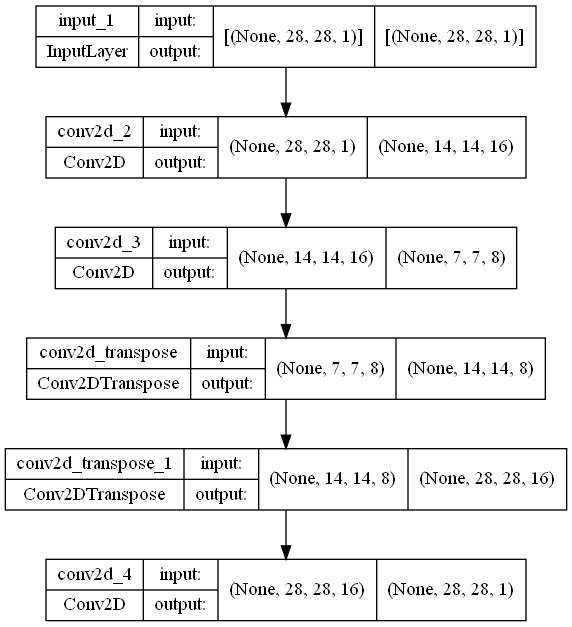

In [35]:
tf.keras.utils.plot_model(autoencoder_jefil, to_file='autoencoder_jefil.png', show_shapes=True, show_layer_names=True)

Create predictions on the unsupervised_val_firstname dataset using TensorFlow's predict(). Name in the predictions autoencoder_predictions_firstname.

In [36]:
autoencoder_predictions_jefil = autoencoder_jefil.predict(unsupervised_val_jefil)

Display (plot) the first 10 predicted images from step 5 the using matplotlib. Remove xticks and yticks when plotting the image

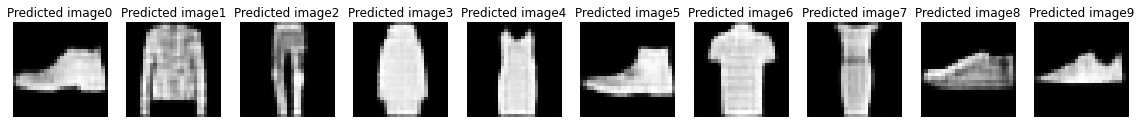

In [37]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("Predicted image"+str(i))
    plt.imshow(tf.squeeze(autoencoder_predictions_jefil[i]))
    plt.axis('off')
    plt.gray()
plt.show()

# Build and perform transfer learning on a CNN with the Autoencoder

Use TensorFlow's Model() [For more info, reference: https://www.tensorflow.org/api_docs/python/tf/keras/Model] to build a cnn mode (name the cnn_v2_firstname) with the following architecture:

i. Input = Transferred from Autoencoder. See step g.1.i

ii. 1 st layer = Transferred from encoder section of Autoencoder (step g.1.ii

iii. 2nd layer = Full connected layer with 100 neurons (Note: Input to fully connected layer should be flatten first)

iv. Output = Set output size using info identified in Step b.3 and a softmax activation function

In [38]:
input_layer = input_jefil
first_layer = autoencoder_jefil.layers[2]
encoder_output = first_layer.output
x = Flatten()((encoder_output))
x = Dense(100, activation='relu')(x)
output = Dense(supervised_jefil['labels'].shape[1], activation= 'softmax')(x)

cnn_v2_jefil = tf.keras.Model(inputs=input_layer, outputs=output)

Compile the model with 'adam' optimizer, 'cateogrical_crossentropy' loss function, 'accuracy' metric

In [39]:
cnn_v2_jefil.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Using TensorFlow's fit() and the training/validation supervised dataset to train and validate the cnn model with 10 epochs and batch size of 256. Store training/validation results in cnn_v2_history_firstname.

In [40]:
cnn_v2_history_jefil=cnn_v2_jefil.fit(x_train_jefil,y_train_jefil,
                epochs=10,
                shuffle=True,
                batch_size=256,
                validation_data=(x_val_jefil,y_val_jefil))

Epoch 1/10
8/8 [==============================] - 0s 27ms/step - loss: 3.1961 - accuracy: 0.1644 - val_loss: 2.1919 - val_accuracy: 0.3450
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 1.8577 - accuracy: 0.4144 - val_loss: 1.5666 - val_accuracy: 0.4667
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 1.3782 - accuracy: 0.5656 - val_loss: 1.2777 - val_accuracy: 0.5750
Epoch 4/10
8/8 [==============================] - 0s 13ms/step - loss: 1.1783 - accuracy: 0.5906 - val_loss: 1.1174 - val_accuracy: 0.6400
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 1.0415 - accuracy: 0.6750 - val_loss: 1.0072 - val_accuracy: 0.6483
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 0.9084 - accuracy: 0.6606 - val_loss: 0.8977 - val_accuracy: 0.6967
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.8243 - accuracy: 0.7078 - val_loss: 0.8180 - val_accuracy: 0.7033
Epoch 8/10
8/8 [===========

In [41]:
cnn_v2_jefil.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               39300     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41,630
Trainable params: 41,630
Non-trainable

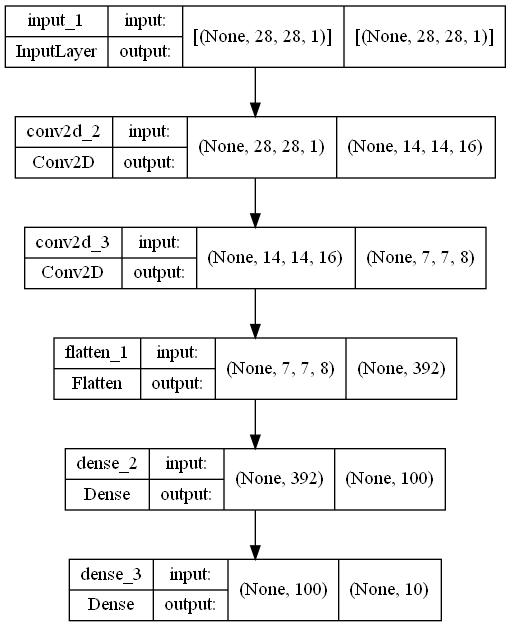

In [42]:
tf.keras.utils.plot_model(cnn_v2_jefil, to_file='model_test.png', show_shapes=True, show_layer_names=True)

# Test and analyze the pretrained CNN model

Display (plot) the Training Vs Validation Accuracy of the pretrained CNN Model as a line graph using matplotlib. Provide proper axis labels, title and a legend. Use different line color's for training and validation accuracy. Compare and analyze the training and validation accuracy in your report.

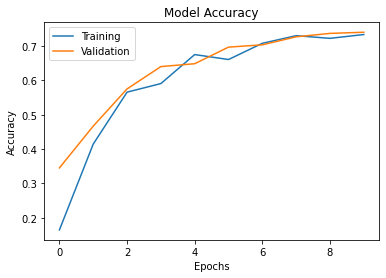

In [43]:
plt.title('Model Accuracy')
plt.plot(cnn_v2_history_jefil.history['accuracy'])
plt.plot(cnn_v2_history_jefil.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'], loc='upper left')
plt.show()

Evaluate the cnn model with the test dataset using Tensorflow's evaluate() and display (Print) the test accuracy. Compare and discuss the test accuracy to the validation accuracy in your report

In [44]:
eval_result = cnn_v2_jefil.evaluate(x_test_jefil,y_test_jefil)
eval_result
print(f'Test loss: {eval_result[0]}')
print(f'Test accuracy: {eval_result[1]}')

19/19 [==============================] - 0s 2ms/step - loss: 0.7465 - accuracy: 0.7450
Test loss: 0.746472179889679
Test accuracy: 0.7450000047683716


In [45]:
print("Train accuracy: ", cnn_v2_history_jefil.history['accuracy'] )
print("Validation accuracy: ", cnn_v2_history_jefil.history['val_accuracy'])

Train accuracy:  [0.1644444465637207, 0.4144444465637207, 0.5655555725097656, 0.5905555486679077, 0.675000011920929, 0.6605555415153503, 0.7077777981758118, 0.7300000190734863, 0.7222222089767456, 0.7333333492279053]
Validation accuracy:  [0.3449999988079071, 0.46666666865348816, 0.574999988079071, 0.6399999856948853, 0.6483333110809326, 0.6966666579246521, 0.70333331823349, 0.7266666889190674, 0.7366666793823242, 0.7400000095367432]


Create predictions on the test dataset using TensorFlow's predict(). Name in the predictions cnn_predictions_firstname.

In [46]:
cnn_predictions_jefil = cnn_v2_jefil.predict(x_test_jefil)

Display (plot) the confusion matrix of the test prediction using matplotlib, seaborn, and sklearn's confusion matrix

In [47]:
predicted_values=[]
for i in range(len(cnn_predictions_jefil)):
    predicted_values.append(np.argmax(cnn_predictions_jefil[i],axis=0))
predicted_values = np.asarray(predicted_values) 

<AxesSubplot:>

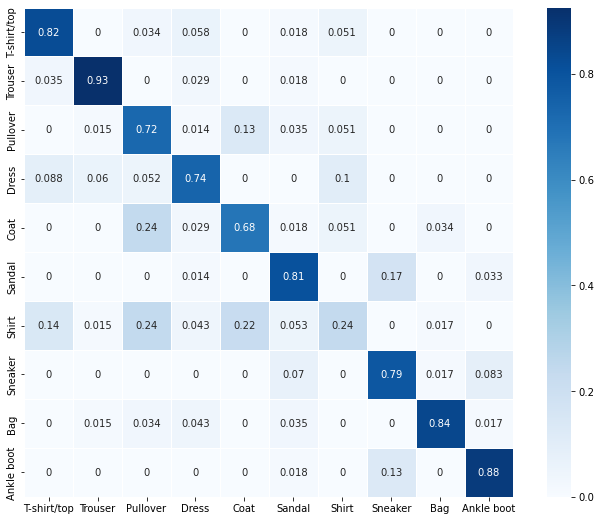

In [48]:
cm = confusion_matrix(test_actual,predicted_values)
confusion_matrix_percentage_data=cm / cm.astype(float).sum(axis=1)
plt.figure(figsize=(12, 9))

sn.heatmap(confusion_matrix_percentage_data,annot=True, cmap='Blues',xticklabels=label_list, yticklabels=label_list, square=1, linewidth=1.)

Display (plot) the Validation Accuracy of the Baseline vs the Pretrained model as a line graph using matplotlib. Provide proper axis labels, title and a legend. Use different line color's for the baseline and pretrained accuracy. Compare and analyze the validation accuracy in your report.

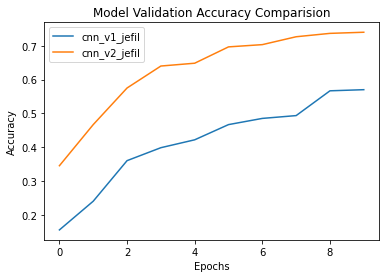

In [49]:
plt.title('Model Validation Accuracy Comparision')
plt.plot(cnn_v1_history_jefil.history['val_accuracy'])
plt.plot(cnn_v2_history_jefil.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['cnn_v1_jefil','cnn_v2_jefil'], loc='upper left')
plt.show()

In [50]:
print("Validation accuracy of baseline model: ", cnn_v1_history_jefil.history['val_accuracy'] )
print("Validation accuracy of Pretrained model: ", cnn_v2_history_jefil.history['val_accuracy'])

Validation accuracy of baseline model:  [0.1550000011920929, 0.23999999463558197, 0.36000001430511475, 0.398333340883255, 0.4216666519641876, 0.46666666865348816, 0.48500001430511475, 0.4933333396911621, 0.5666666626930237, 0.5699999928474426]
Validation accuracy of Pretrained model:  [0.3449999988079071, 0.46666666865348816, 0.574999988079071, 0.6399999856948853, 0.6483333110809326, 0.6966666579246521, 0.70333331823349, 0.7266666889190674, 0.7366666793823242, 0.7400000095367432]


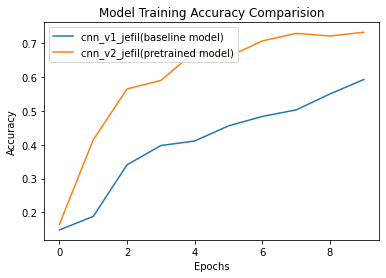

In [51]:
plt.title('Model Training Accuracy Comparision')
plt.plot(cnn_v1_history_jefil.history['accuracy'])
plt.plot(cnn_v2_history_jefil.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['cnn_v1_jefil(baseline model)','cnn_v2_jefil(pretrained model)'], loc='upper left')
plt.show()